In [6]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

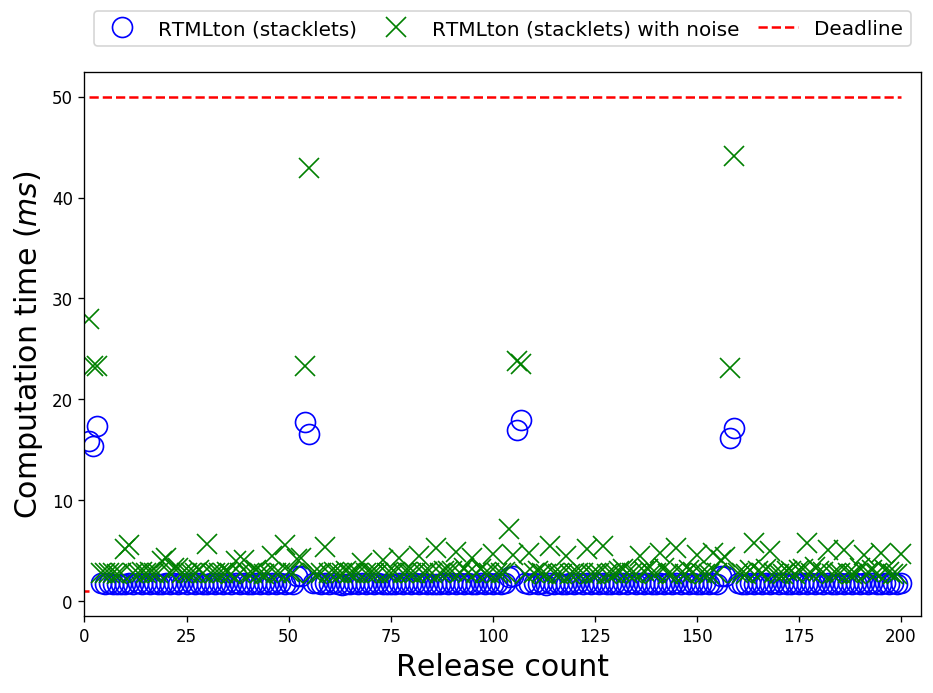

In [45]:
#RTMLTON STACKLETS

#prep data
with open("rtmlton_nonoise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

nonoise =  [int(s) for s in content.split(',')]




nonoise = [x/1000 for x in nonoise]

nonoise = nonoise[:200]


data2 = range(1,len(nonoise)+1,1)

data4 = [50 for x in data2]


#prep data
with open("rtmlton_noise.txt") as f2:
    content2 = f2.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

noise = [int(s) for s in content2.split(',')]




noise = [x/1000 for x in noise]

noise= noise [:200]

ls = [x for x in noise if x > 50]
for item in ls:
    print(item)
#noise = noise[:100]
#nonoise=nonoise[:100]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6),dpi=120,)



plt.xlim(0,len(noise)+5)

plt.ylabel("Computation time ($ms$)",fontsize=18)
plt.xlabel("Release count",fontsize=18)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('12')

# Legend creation
hB, = plt.plot([1,1],'o',color='b',markersize='12',fillstyle ='none')
hR, = plt.plot([1,1],'x',color='g',markersize='12',fillstyle='none')
hL, = plt.plot([1,1],'--',color='r')
plt.legend((hB, hR,hL),('RTMLton (stacklets)', 'RTMLton (stacklets) with noise','Deadline'),prop = fontP,loc=1,ncol=3,mode="expand",bbox_to_anchor=(0., 1.03, 1., .1))
hB.set_visible(False)
hR.set_visible(False)


plt.plot(data2,nonoise,'bo',data2,noise,'gx',fillstyle='none',markersize='12')
plt.plot(data2,data4,'r--')
plt.tick_params(labelsize=10)


#plt.plot(testd1,testnonoise,'bo',testd1,testnoise,'go',fillstyle='none')
#plt.plot(testd1,testd2,'r--',alpha=0.5)

pp = PdfPages("{}.pdf".format("cd_rtmlton_stacklets"))
pp.savefig(fig)
pp.close()


plt.show()

452.045
367.374
82.489
454.404
352.631
88.395
449.627
348.943
88.269
448.799
347.604
88.693


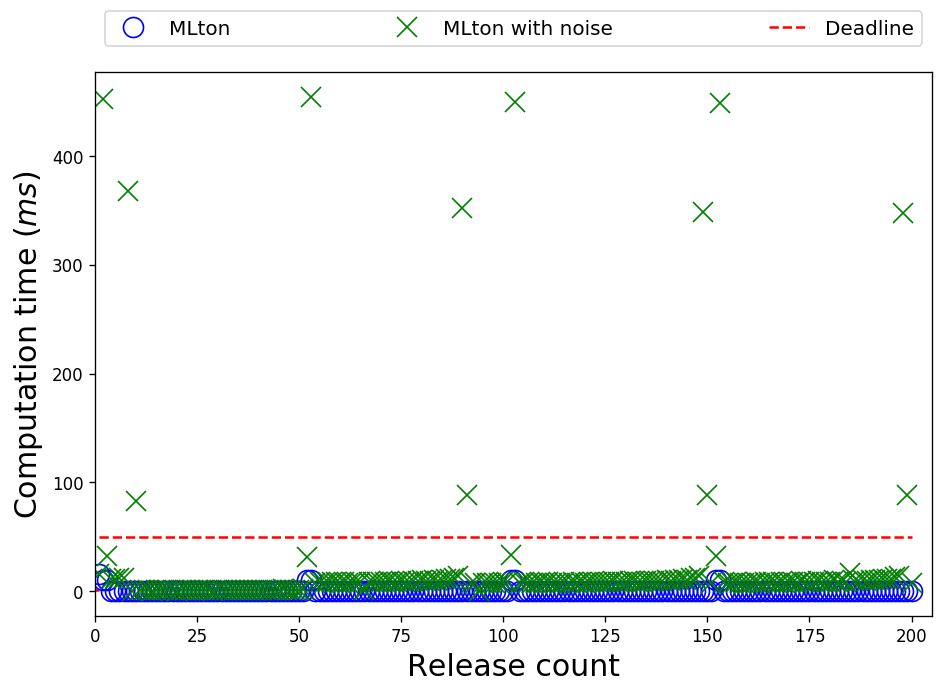

In [46]:
#MLTon

#RTMLTON

#prep data
with open("mlton_nonoise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

nonoise =  [int(s) for s in content.split(',')]




nonoise = [x/1000 for x in nonoise]

nonoise = nonoise[:200]


data2 = range(1,len(nonoise)+1,1)

data4 = [50 for x in data2]


#prep data
with open("mlton_noise.txt") as f2:
    content2 = f2.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

noise = [int(s) for s in content2.split(',')]




noise = [x/1000 for x in noise]

noise= noise [:200]

ls = [x for x in noise if x > 50]
for item in ls:
    print(item)
#noise = noise[:100]
#nonoise=nonoise[:100]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6),dpi=120,)



plt.xlim(0,len(noise)+5)

plt.ylabel("Computation time ($ms$)",fontsize=18)
plt.xlabel("Release count",fontsize=18)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('12')

# Legend creation
hB, = plt.plot([1,1],'o',color='b',markersize='12',fillstyle ='none')
hR, = plt.plot([1,1],'x',color='g',markersize='12',fillstyle='none')
hL, = plt.plot([1,1],'--',color='r')
plt.legend((hB, hR,hL),('MLton', 'MLton with noise','Deadline'),prop = fontP,loc=1,ncol=3,mode="expand",bbox_to_anchor=(0., 1.03, 1., .1))
hB.set_visible(False)
hR.set_visible(False)


plt.plot(data2,nonoise,'bo',data2,noise,'gx',fillstyle='none',markersize='12')
plt.plot(data2,data4,'r--')
plt.tick_params(labelsize=10)


#plt.plot(testd1,testnonoise,'bo',testd1,testnoise,'go',fillstyle='none')
#plt.plot(testd1,testd2,'r--',alpha=0.5)

pp = PdfPages("{}.pdf".format("cd_mlton"))
pp.savefig(fig)
pp.close()


plt.show()

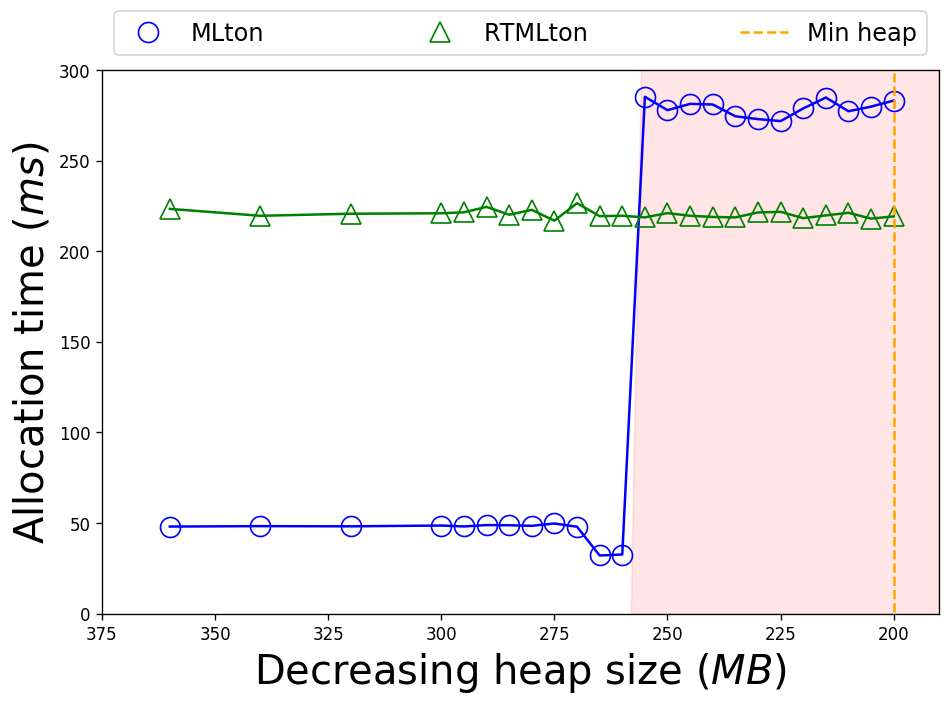

In [47]:
#prep data
#FRAMENTATION TOLERANCE


rtmlton =[219231,218015,221240,219787,218283,221766,221430,218689,218943,219592,221064,
          218703,219597,219387,226533,216887,222856,220163,224505,221505,220961,
          220710,219583,223385]

mlton =[283179,279830,277272,284845,278820,271838,272932,274501,281006,281350,277875,285248,32651,32110,47980,49761,
        48484,48789,48892,48127,48641,48200,48307,48075]

heap =[200,205,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280,285,290,295,300,320,340,360]


rtmlton = [x/1000 for x in rtmlton]
mlton =[x/1000 for x in mlton]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6),dpi=120,)


plt.xlim(375, 190)
plt.ylim(0,300)

#rc = dict(markerfacecolor='#e7298a', marker='o',alpha=0.5)
plt.ylabel("Allocation time ($ms$)",fontsize=24)
plt.xlabel("Decreasing heap size ($MB$)",fontsize=24)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('x-large')

# Legend creation
hB, = plt.plot([1,1],'o',color='b',markersize='12',fillstyle='none')
hR, = plt.plot([1,1],'^',color='g',markersize='12',fillstyle ='none')
hL, = plt.plot([1,1],'--',color='orange')
plt.legend((hB, hR,hL),('MLton', 'RTMLton','Min heap'),prop = fontP,loc=1,ncol=3,mode="expand",bbox_to_anchor=(0., 1.03, 1., .1))

hB.set_visible(False)
hR.set_visible(False)

y = [0, 400]
x1 = [258,  255]
x2 = [190,  190]

plt.fill_betweenx(y, x1, x2,alpha=0.1,color ='r')

plt.plot(heap,mlton,'bo-',heap,rtmlton,'g^-',markersize='12',fillstyle='none')
plt.plot([200 for x in range(1,300)],range(1,300),'--',color='orange')

#plt.plot(testd1,testnonoise,'bo',testd1,testnoise,'go',fillstyle='none')
#plt.plot(testd1,testd2,'r--',alpha=0.5)

pp = PdfPages("{}.pdf".format("fragtol"))
pp.savefig(fig)
pp.close()


plt.show()

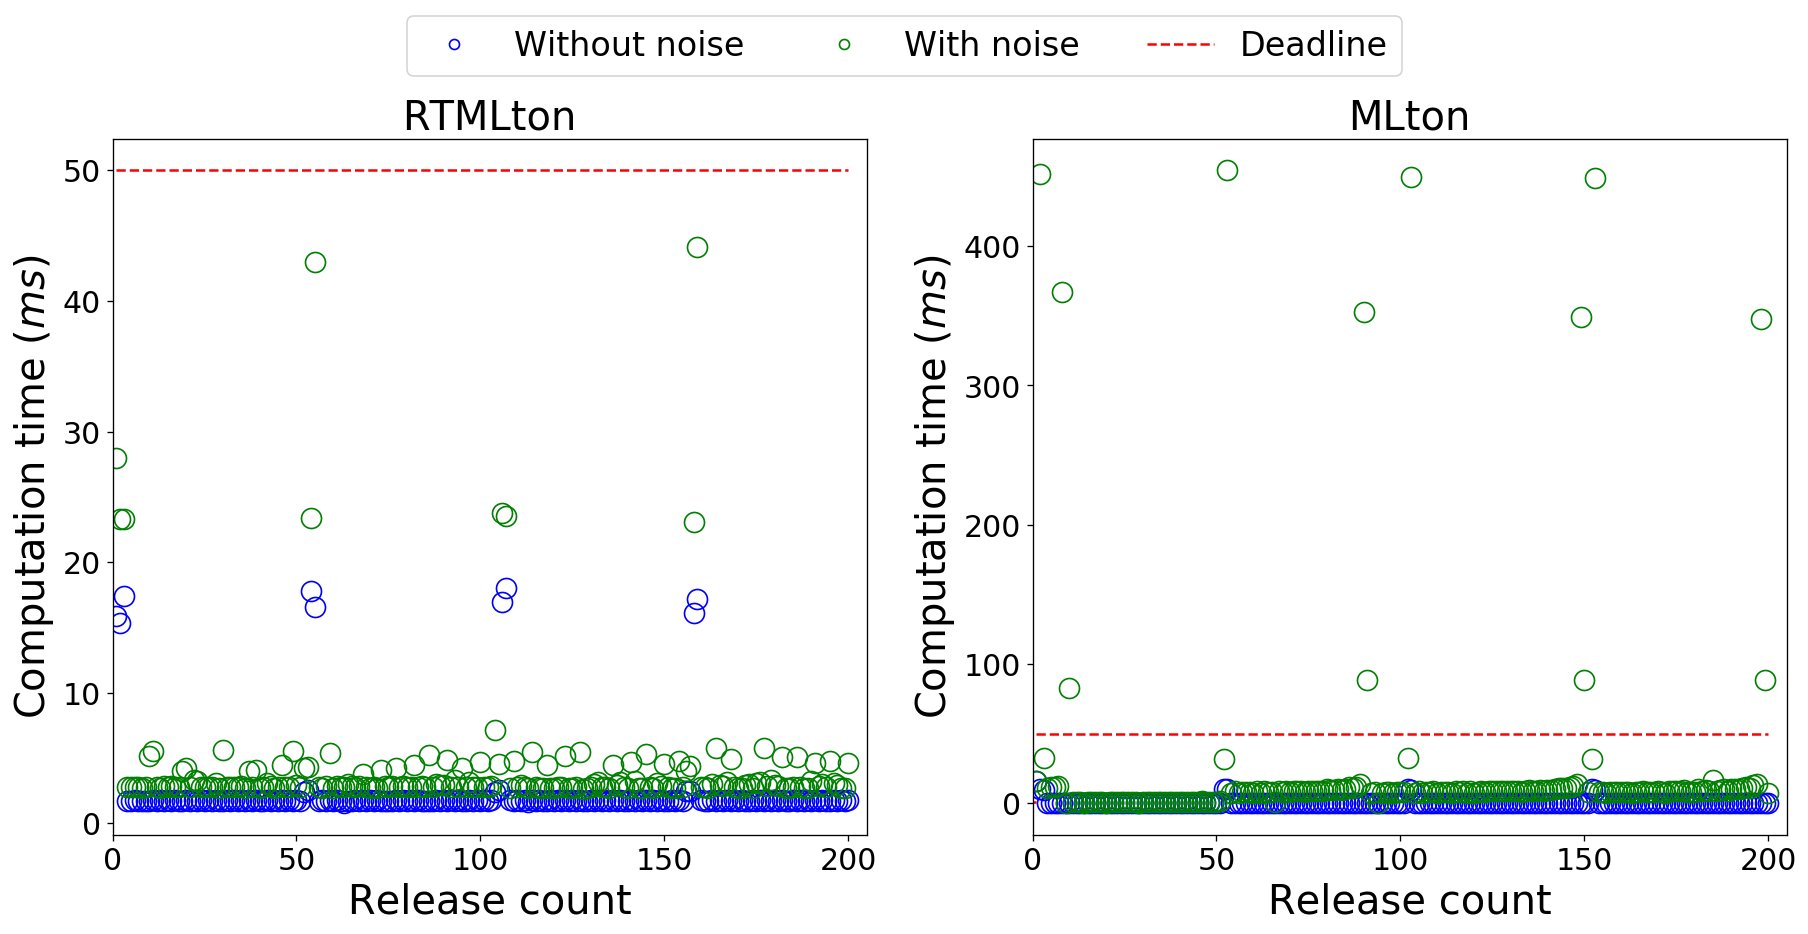

In [48]:
#RTMLTON

#prep data
with open("rtmlton_nonoise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

nonoise =  [int(s) for s in content.split(',')]


nonoise = [x/1000 for x in nonoise][:200]


data2 = range(1,len(nonoise)+1,1)

data4 = [50 for x in data2]


#prep data
with open("rtmlton_noise.txt") as f2:
    content2 = f2.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

noise = [int(s) for s in content2.split(',')][:200]


noise = [x/1000 for x in noise]



# Create a figure instance
fig, (ax, ax1) = plt.subplots(1, 2, sharex=True,figsize=(18, 8),dpi=120,)


ax.set_xlim(0,len(noise)+5)

ax.set_ylabel("Computation time ($ms$)",fontsize=24)
ax.set_xlabel("Release count",fontsize=24)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')




ax.plot(data2,nonoise,'bo',data2,noise,'go',fillstyle='none',markersize='12')
ax.plot(data2,data4,'r--')



#MLton
#prep data
with open("mlton_noise.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
content = [x for x in content if x.startswith('@')][0]
content=content[1:-2]

noise =  [int(s) for s in content.split(',')]

noise=[x/1000 for x in noise][:200]

#prep data
with open("mlton_nonoise.txt") as f:
    content2 = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content2 = [x.strip() for x in content2]
content2 = [x for x in content2 if x.startswith('@')][0]
content2=content2[1:-2]

nonoise =  [int(s) for s in content2.split(',')]

nonoise = [x/1000 for x in nonoise][:200]


data2 = range(1,len(noise)+1,1)

data4 = [50 for x in data2]

ax1.set_xlim(0,len(noise)+5)

ax1.set_ylabel("Computation time ($ms$)",fontsize=24)
ax1.set_xlabel("Release count",fontsize=24)



# Legend creation
hB, = plt.plot([1,1],'o',color='b',fillstyle ='none')
hR, = plt.plot([1,1],'o',color='g',fillstyle='none')
hL, = plt.plot([1,1],'--',color='r')

plt.figlegend( (hB, hR,hL), ('Without noise', 'With noise','Deadline'),fontsize='20', loc = 'upper center', ncol=3,
            )

hB.set_visible(False)
hR.set_visible(False)


ax1.plot(data2,nonoise,'bo',data2,noise,'go',fillstyle='none',markersize='12')
ax1.plot(data2,data4,'r--')


ax.set_title("RTMLton",fontsize='24')
ax1.set_title("MLton",fontsize='24')

plt.subplots_adjust(wspace=0.22, top=0.85)

ax.tick_params(labelsize=18)
ax1.tick_params(labelsize=18)




pp = PdfPages("{}.pdf".format("cd_mlton_rtmlton"))
pp.savefig(fig)
pp.close()

plt.show()